02_preprocessing_and_baseline_iforest.ipynb

#Week 2 - Baseline Anomaly Detection

### Apply preprocessing, run Isolation Forest, basic anomaly detection.

In [ ]:
# 1. Import libraries
# Install necessary packages (if not already installed)
# Run these commands in a code cell or terminal if using Jupyter locally
# !pip install pandas numpy matplotlib seaborn scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# 2. Define file path
file_path = 'InternalBleeding14.csv'  # Assumes file is in the same directory

# 3. Load dataset
df = pd.read_csv(file_path)

# 4. Display first 10 rows
print("\nFirst 10 rows of dataset:")
display(df.head(10))


First 10 rows of dataset:


,timestamp,value
0,0,97.46170
1,1,97.38159
2,2,97.18323
3,3,96.96197
4,4,96.67206
5,5,96.55380
6,6,96.62247
7,7,96.48132
8,8,96.52329
9,9,96.79413



# Baseline Isolation Forset

In [ ]:
# 5. Normalise value column (Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['value_scaled'] = scaler.fit_transform(df[['value']])

# 6. Apply Isolation Forest for anomaly detection
from sklearn.ensemble import IsolationForest

# Define model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['anomaly_score'] = isolation_forest.fit_predict(df[['value_scaled']])

# 7. Convert anomaly output: -1 (anomaly), 1 (normal)
df['anomaly'] = df['anomaly_score'].map({1: 0, -1: 1})

# 8. Display small sample for verification
print("\nSample of dataset with anomaly predictions:")
display(df.head(10))

# 9. Print anomaly summary count
print("\nAnomaly counts:")
display(df['anomaly'].value_counts())


Sample of dataset with anomaly predictions:


,timestamp,value,value_scaled,anomaly_score,anomaly
0,0,97.46170,0.733364,1,0
1,1,97.38159,0.731460,1,0
2,2,97.18323,0.726746,1,0
3,3,96.96197,0.721487,1,0
4,4,96.67206,0.714597,1,0
5,5,96.55380,0.711786,1,0
6,6,96.62247,0.713418,1,0
7,7,96.48132,0.710064,1,0
8,8,96.52329,0.711061,1,0
9,9,96.79413,0.717498,1,0



Anomaly counts:


,count
anomaly,
0,7127
1,374


### Output Explanation

- **Sample Dataset Preview:**  
  - We display the first 10 rows after applying Isolation Forest.
  - New columns:
    - `value_scaled`: Original `value` column scaled between 0 and 1 using MinMaxScaler.
    - `anomaly_score`: Raw prediction from Isolation Forest (1 = normal, -1 = anomaly).
    - `anomaly`: Converted to binary indicator (0 = normal, 1 = anomaly).

- **Anomaly Counts Summary:**  
  - Out of 7501 total samples:
    - 7127 are predicted as normal (`anomaly = 0`).
    - 374 are flagged as anomalies (`anomaly = 1`).
  - This matches the initial contamination setting of 5% in the Isolation Forest model.
  
- **Educational Note:**  
  The anomaly detection successfully identified a small fraction of observations as anomalous, which we will later explore further using dimensionality reduction and clustering methods in Week 3.


# Visualisation

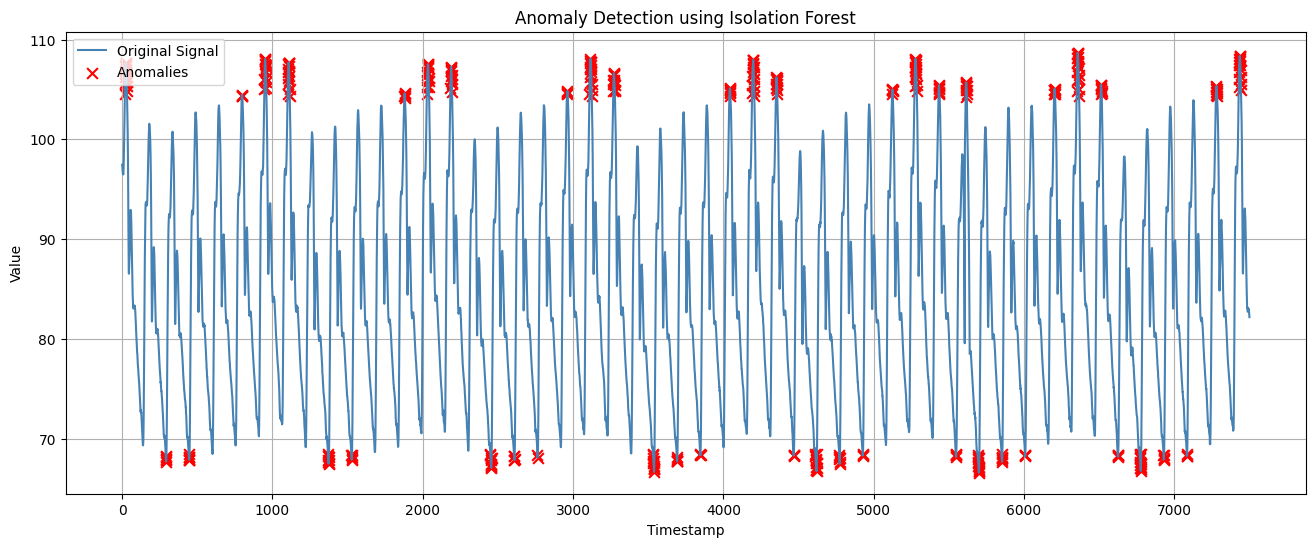

In [ ]:
plt.figure(figsize=(16,6))

# Plot original signal
plt.plot(df['timestamp'], df['value'], label='Original Signal', color='steelblue')

# Overlay detected anomalies
plt.scatter(
    df[df['anomaly'] == 1]['timestamp'],
    df[df['anomaly'] == 1]['value'],
    color='red',
    label='Anomalies',
    marker='x',
    s=60
)

plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()


## Output Explanation — Visualisation of Detected Anomalies

The time series plot above shows the full InternalBleeding14 dataset after applying the Isolation Forest model.

- The blue curve represents the complete signal across all timestamps.
- The red 'x' markers indicate data points flagged as anomalies by the model.

This visualisation allows us to verify that the Isolation Forest correctly identifies both unusually high peaks and abnormally low troughs in the signal, which represent deviations from the expected cyclic pattern. The model successfully isolates outliers that deviate from the typical oscillating behaviour of the physiological sensor data.

This plot serves as a quick initial verification that the model is operational and sensitive to unusual fluctuations. Detailed validation will follow in later stages.
